In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
dataset_path = "Regression_Dataset.csv"
data = pd.read_csv(dataset_path)

In [ ]:
X = data[["Machine_Weight_kg"]]  # Feature
y = data["Rental_Price_per_Hour"]  # Target

#(80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizing X for better convergence
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]  # Add bias term

# Initialize
theta = np.zeros(2)  #(theta0, theta1)
alpha = 0.01  # Learning rate
iterations = 1000  # Number of gradient descent steps
m = len(y_train)  # Number of samples


# Cost function

In [ ]:
def compute_cost(X, y, theta):
    predictions = X @ theta
    error = predictions - y
    return (1 / (2 * m)) * np.sum(error ** 2)

# Gradient Descent function

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []

    for _ in range(iterations):
        predictions = X @ theta
        error = predictions - y
        gradient = (1 / m) * (X.T @ error)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


In [ ]:
theta_final, cost_history = gradient_descent(X_train_norm, y_train, theta, alpha, iterations)

print("\nGradient Descent Model Coefficients:")
print(f"Intercept (θ₀): {theta_final[0]}")
print(f"Slope (θ₁): {theta_final[1]}")


Gradient Descent Model Coefficients:
Intercept (θ₀): 232.13939186695987
Slope (θ₁): 74.44147924263982


# Visualisation

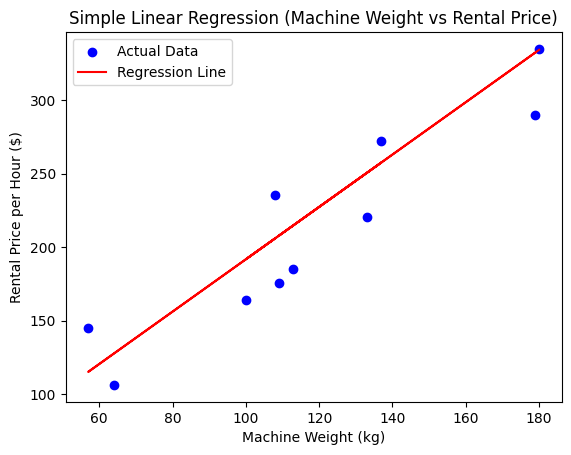

In [ ]:
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred_sklearn, color="red", label="Regression Line")
plt.xlabel("Machine Weight (kg)")
plt.ylabel("Rental Price per Hour ($)")
plt.title("Simple Linear Regression (Machine Weight vs Rental Price)")
plt.legend()
plt.show()